In [17]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv(r"C:\Users\nice\Desktop\projects\GTC recomomdation system\data\Reviews.csv")
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


# شرح الأعمدة في الداتا

| العمود | الوصف | أهميته في التوصية |
|--------|-------|--------------------|
| **Id** | رقم تسلسلي للصف (index) | غير مهم، ممكن يتشال |
| **ProductId** | الـ ID الخاص بالمنتج | أساسي (بنعرف المنتج) |
| **UserId** | الـ ID الخاص بالمستخدم | أساسي (بنعرف المستخدم) |
| **ProfileName** | اسم المستخدم (username) | ثانوي (مش دقيق زي UserId) |
| **HelpfulnessNumerator** | عدد الأشخاص اللي لقوا الريفيو مفيد | ممكن تستخدمه لوزن التقييمات |
| **HelpfulnessDenominator** | العدد الكلي للي قيموا الريفيو (مفيد/مش مفيد) | مع الـ Numerator تقدر تحسب نسبة فائدة الريفيو |
| **Score** | التقييم اللي المستخدم أداه (عادة من 1–5) | أهم عمود (اللي هيتبني عليه نظام التوصية) |
| **Time** | وقت كتابة الريفيو (Unix Timestamp) | مفيد لو عاوز تدي وزن أكبر للتقييمات الحديثة |
| **Summary** | عنوان قصير للريفيو (مثال: *Great product!*) | مفيد للـ NLP لكن مش أساسي |
| **Text** | نص الريفيو اللي كتبه المستخدم | مهم جدًا لو هتضيف تحليل مشاعر (Sentiment Analysis) أو NLP |


In [19]:
df.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

# Data Preprocessing

In [20]:
df=df.drop(columns=["Text","Summary"]).copy()
df=df.dropna()

In [21]:
df.duplicated().sum()

0

In [22]:
df["Time"]=pd.to_datetime(df["Time"],unit='s')
df["year"]=df["Time"].dt.year
df["month"]=df["Time"].dt.month
df["day"]=df["Time"].dt.day
df["dayofweek"]=df["Time"].dt.dayofweek
df.drop("Time",axis=1,inplace=True)

In [23]:
df.head(1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,year,month,day,dayofweek
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011,4,27,2


# Data visualization

Text(0, 0.5, 'Count')

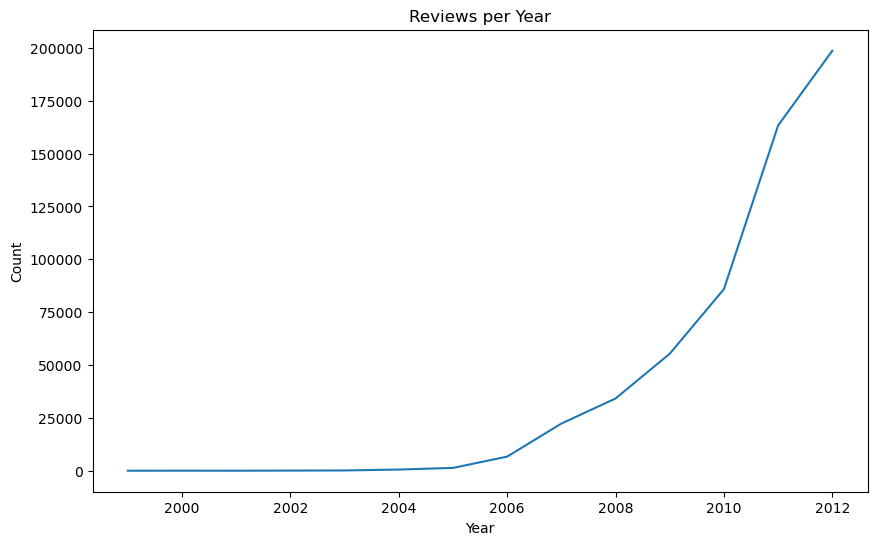

In [43]:
plt.figure(figsize=(10,6))
df['year'].value_counts().sort_index().plot(kind='line')
plt.title("Reviews per Year")
plt.xlabel("Year")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

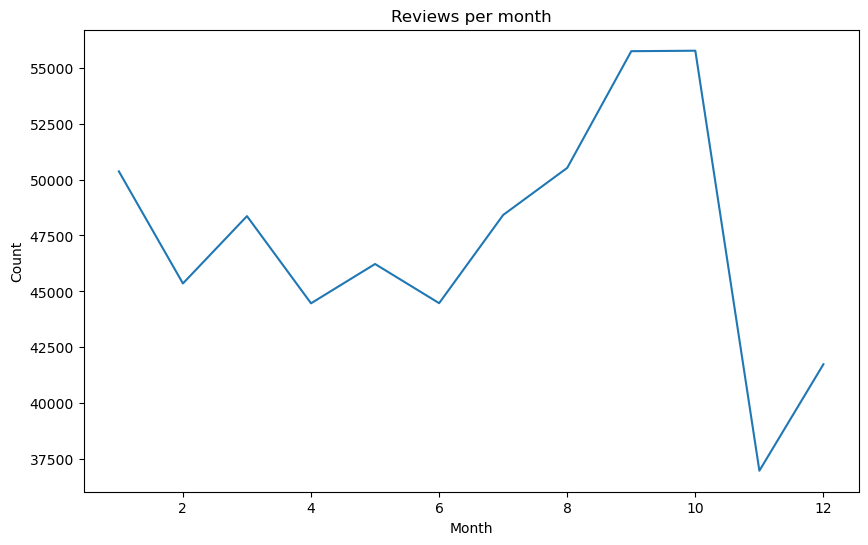

In [44]:
plt.figure(figsize=(10,6))
df['month'].value_counts().sort_index().plot(kind='line')
plt.title("Reviews per month")
plt.xlabel("Month")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

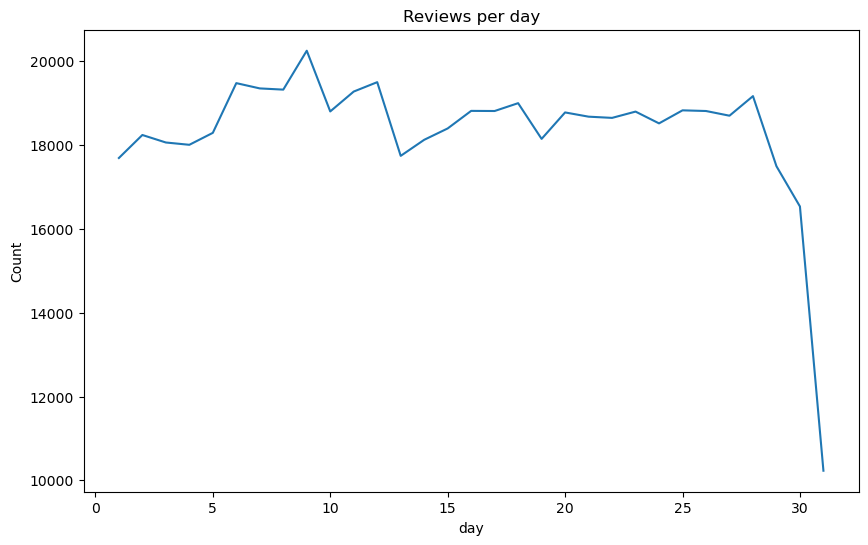

In [45]:
plt.figure(figsize=(10,6))
df['day'].value_counts().sort_index().plot(kind='line')
plt.title("Reviews per day")
plt.xlabel("day")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

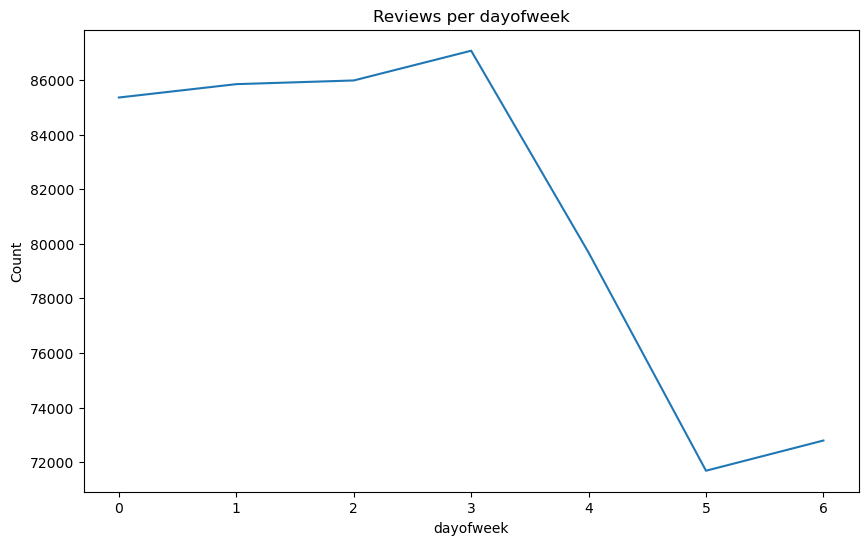

In [46]:
plt.figure(figsize=(10,6))
df['dayofweek'].value_counts().sort_index().plot(kind='line')
plt.title("Reviews per dayofweek")
plt.xlabel("dayofweek")
plt.ylabel("Count")

([<matplotlib.patches.Wedge at 0x1970bc6fef0>,
 [Text(-0.2850552599739168, -1.062423408421145, '5'),
  Text(0.8955058138839815, 0.638803050477992, '4'),
  Text(0.23635716366395, 1.074306888735585, '1'),
  Text(-0.33342398393123535, 1.0482501833719962, '3'),
  Text(-0.7154663847420034, 0.8355284868298672, '2')],
 [Text(-0.15548468725850006, -0.5795036773206245, '63.9%'),
  Text(0.48845771666398985, 0.34843802753345016, '14.2%'),
  Text(0.12892208927124543, 0.5859855756739555, '9.2%'),
  Text(-0.1818676275988556, 0.5717728272938161, '7.5%'),
  Text(-0.39025439167745635, 0.45574281099810937, '5.2%')])

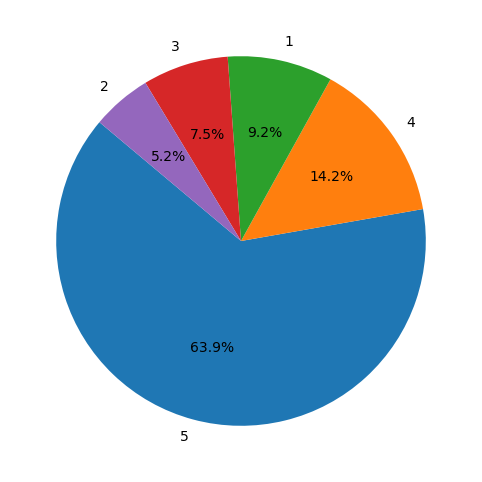

In [ ]:
plt.figure(figsize=(10,6))
plt.pie(df["Score"].value_counts(), labels=df['Score'].value_counts().index, autopct='%1.1f%%', startangle=140)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'A3OXHLG6DIBRW8'),
  Text(1, 0, 'A1YUL9PCJR3JTY'),
  Text(2, 0, 'AY12DBB0U420B'),
  Text(3, 0, 'A281NPSIMI1C2R'),
  Text(4, 0, 'A1Z54EM24Y40LL'),
  Text(5, 0, 'A1TMAVN4CEM8U8'),
  Text(6, 0, 'A2MUGFV2TDQ47K'),
  Text(7, 0, 'A3TVZM3ZIXG8YW'),
  Text(8, 0, 'A3PJZ8TU8FDQ1K'),
  Text(9, 0, 'AQQLWCMRNDFGI')])

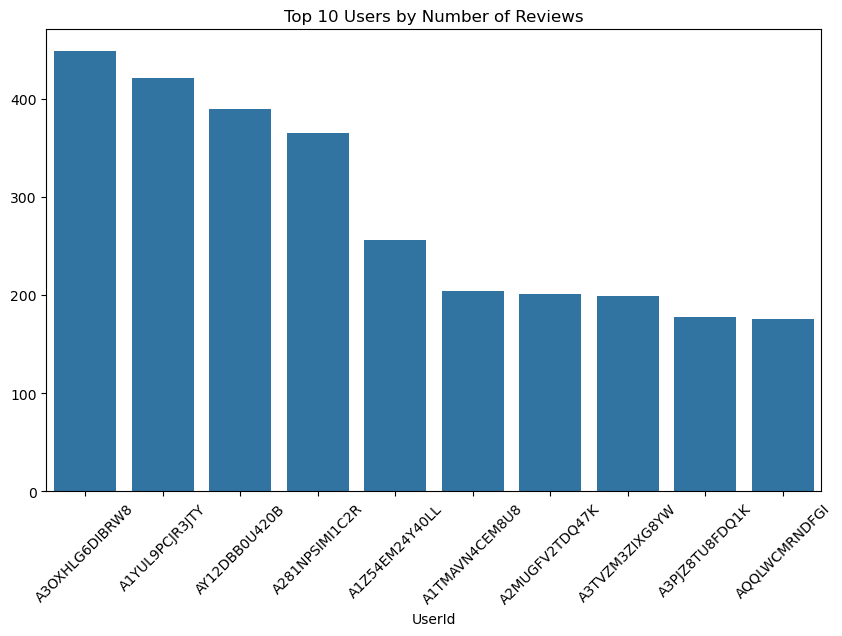

In [29]:
top_users = df['UserId'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_users.index, y=top_users.values,)
plt.title('Top 10 Users by Number of Reviews')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'B007JFMH8M'),
  Text(1, 0, 'B0026RQTGE'),
  Text(2, 0, 'B002QWP89S'),
  Text(3, 0, 'B002QWHJOU'),
  Text(4, 0, 'B002QWP8H0'),
  Text(5, 0, 'B003B3OOPA'),
  Text(6, 0, 'B001EO5Q64'),
  Text(7, 0, 'B000VK8AVK'),
  Text(8, 0, 'B0026KNQSA'),
  Text(9, 0, 'B0026KPDG8')])

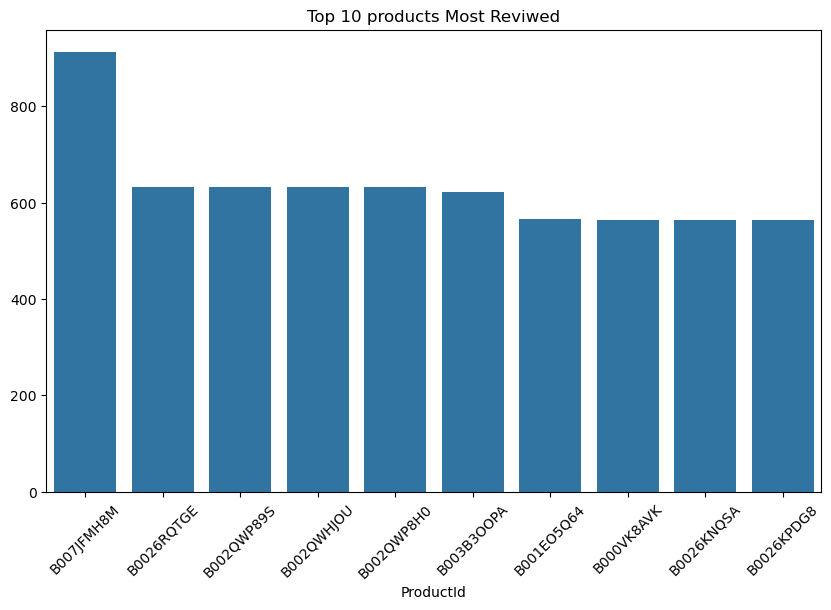

In [30]:
top_users = df["ProductId"].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_users.index, y=top_users.values,)
plt.title('Top 10 products Most Reviwed')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Average Score by dayofweek')

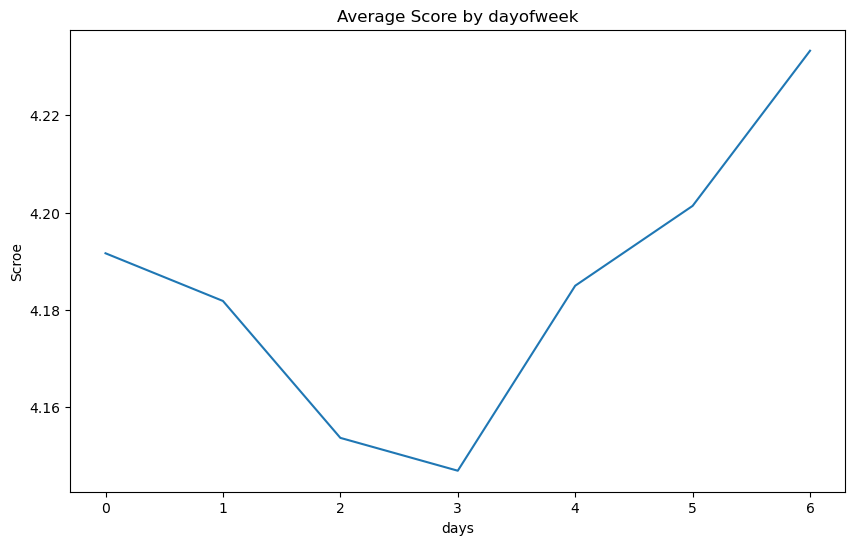

In [42]:
plt.figure(figsize=(10,6))
df.groupby("dayofweek")["Score"].mean().plot(kind="line")
plt.ylabel("Scroe")
plt.xlabel("days")
plt.title("Average Score by dayofweek")


Text(0.5, 1.0, 'Average Score by year')

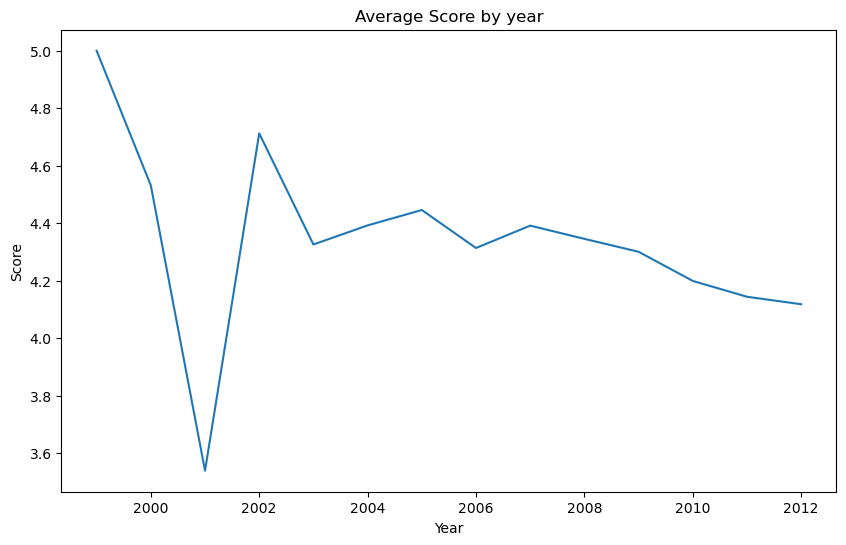

In [32]:
plt.figure(figsize=(10,6))
df.groupby("year")["Score"].mean().plot(kind="line")
plt.ylabel("Score")
plt.xlabel("Year")
plt.title("Average Score by year")


Text(0.5, 1.0, 'Average Score by month')

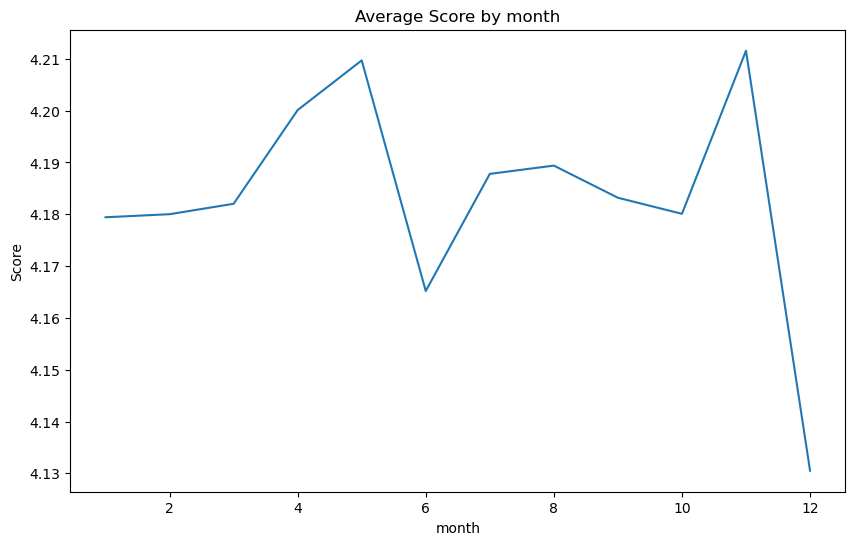

In [33]:
plt.figure(figsize=(10,6))
df.groupby("month")["Score"].mean().plot(kind="line")
plt.ylabel("Score")
plt.xlabel("month")
plt.title("Average Score by month")

In [ ]:
df.to_csv(r"C:\Users\nice\Desktop\projects\GTC recomomdation system\data\clean_model1_reviews.csv")